<a href="https://colab.research.google.com/github/sarfrazahmd982/Kaggle_Bike_Sharing_Demand/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## STEPS INVOLVED:
- READ THE DATA.
- PRELIMINARY ANALYSIS OF DATA.
- VISUALIZE THE DATA.
- CHECK MULTIPLE LINEAR REGRESSION ASSUMPTIONS:
  - NORMALITY.
  - LINEAR CORRELATION.
  - MULTI COLLINEARITY.
  - AUTO CORRELATION.
  - SAMPLE SIZE.
- DROP IRRELEVANT FEATURES.
- CREATE/ MODIFY FEATURES.
- CREATE DUMMY VARIABLES.
- TRAIN TEST SPLIT.
- FIT AND SCORE THE MODEL.
- PRESENT THE RESULT.

In [ ]:
# STEP 0 - IMPORT THE LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# STEP 1 - READ THE DATA
data=pd.read_csv('hour.csv')

In [ ]:
df=data.copy()

In [ ]:
df.shape

(17379, 17)

In [ ]:
# STEP 2 - PRELIMINARY ANALYSIS
df.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
# we will drop irrelevant features
df=df.drop(['index','casual','registered'],axis=1)
df.shape

(17379, 14)

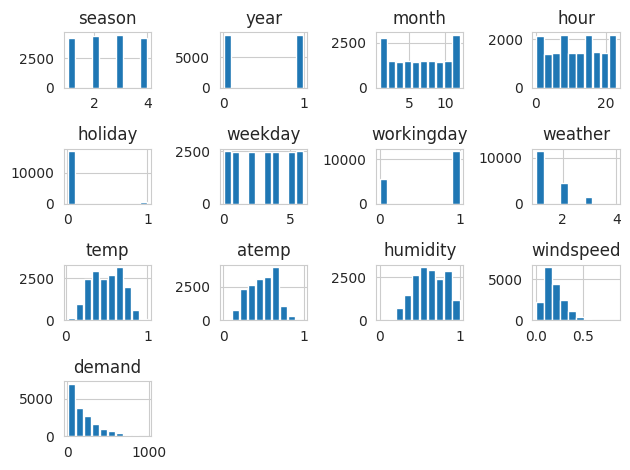

In [ ]:
df.hist(rwidth=0.9)
plt.tight_layout()

Text(0.5, 1.0, 'Weather and Demand')

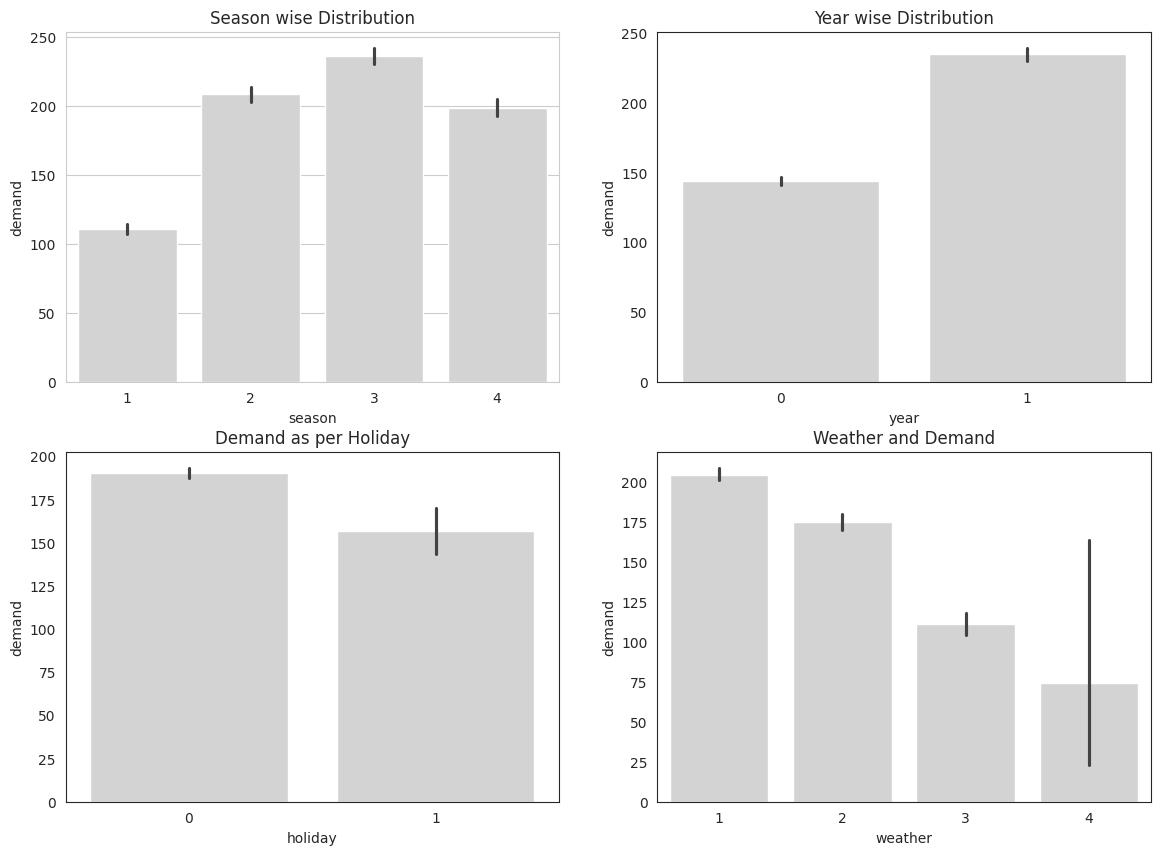

In [ ]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.set_style('white')
sns.barplot(data=df,x='season',y='demand',color='lightGray')
plt.title('Season wise Distribution')
plt.subplot(2,2,2)
sns.set_style('white')
sns.barplot(data=df,x='year',y='demand',color='lightgray')
plt.title('Year wise Distribution')
plt.subplot(2,2,3)
sns.set_style('white')
sns.barplot(data=df,x='holiday',y='demand',color='lightgray')
plt.title('Demand as per Holiday')
plt.subplot(2,2,4)
sns.set_style('white')
sns.barplot(data=df,x='weather',y='demand',color='lightgray')
plt.title('Weather and Demand')

Text(0.5, 1.0, 'Month vs Demand')

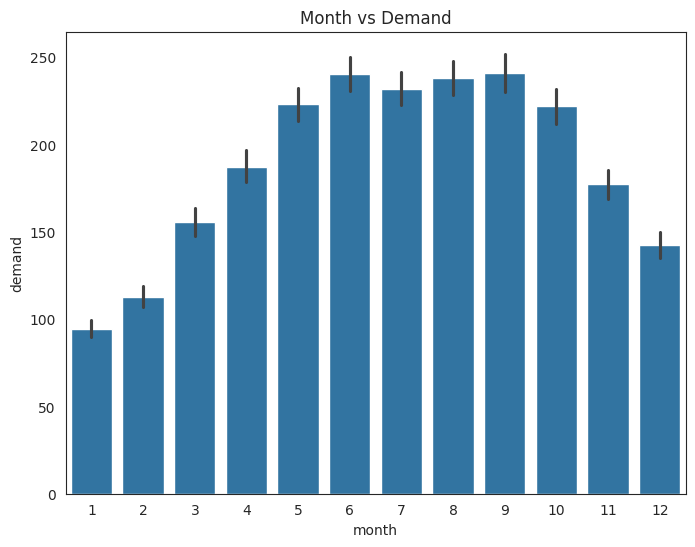

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=df,x='month',y='demand')
plt.title('Month vs Demand')

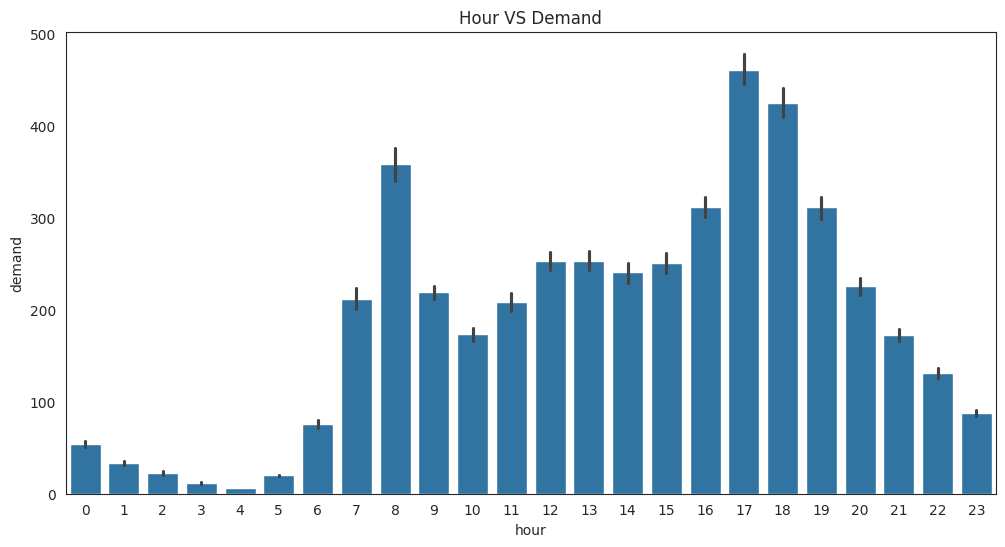

In [ ]:
plt.figure(figsize=(12,6))
ax=sns.barplot(data=df,x='hour',y='demand')
plt.title('Hour VS Demand')
plt.show()

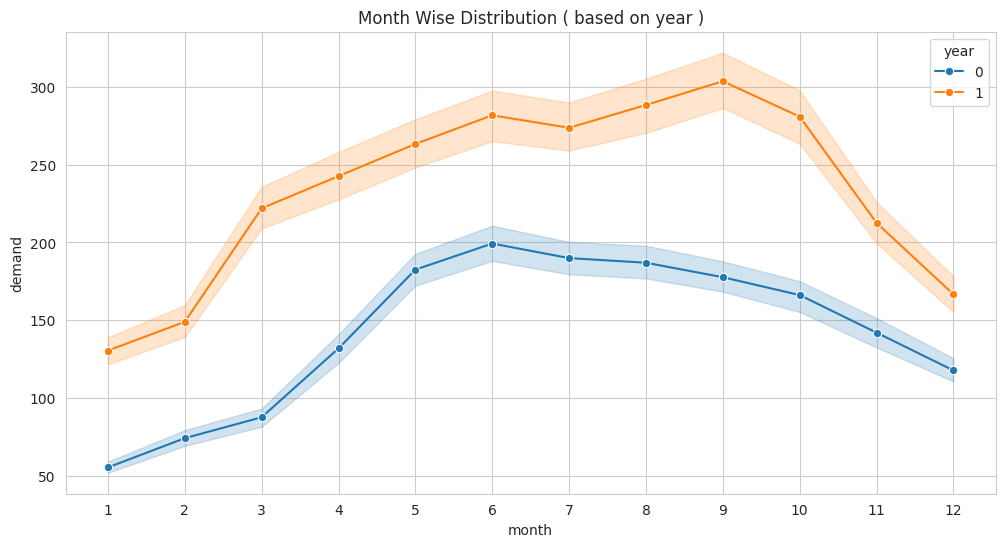

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.lineplot(data=df,x='month',y='demand',hue='year',marker='o',)
plt.xticks(range(1, 13))
plt.title('Month Wise Distribution ( based on year )')
plt.show()

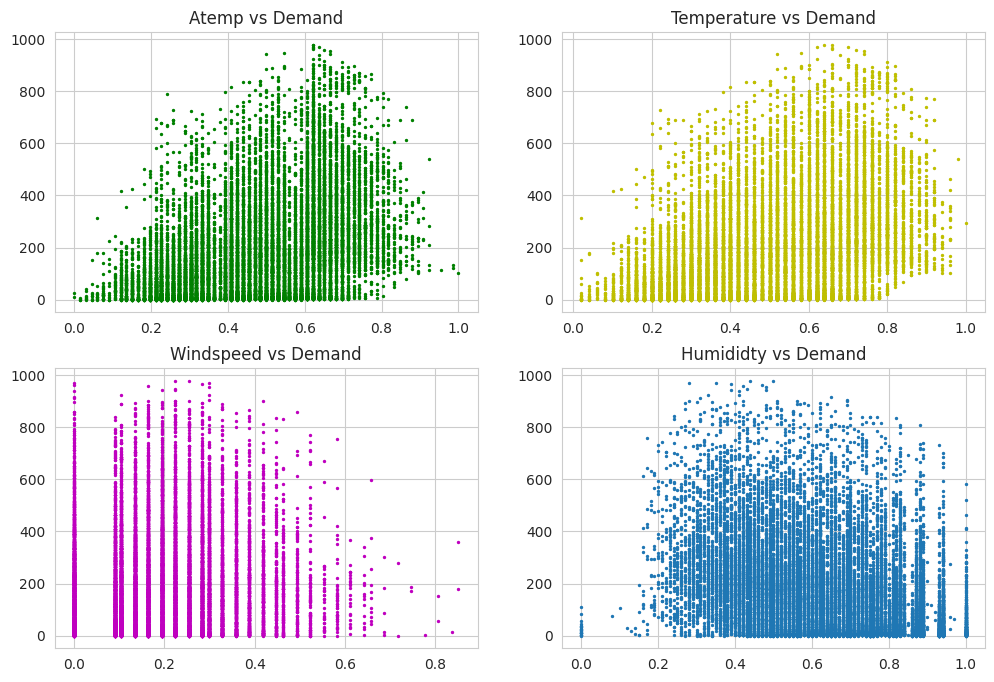

In [ ]:
# visualizing the continuous features.....
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.title('Atemp vs Demand')
plt.scatter(x=df['atemp'],y=df['demand'],s=2,c='g')
#--------------------------------------------
plt.subplot(2,2,2)
plt.title('Temperature vs Demand')
plt.scatter(x=df['temp'],y=df['demand'],s=2,c='y')
#--------------------------------------------
plt.subplot(2,2,3)
plt.title('Windspeed vs Demand')
plt.scatter(x=df['windspeed'],y=df['demand'],s=2,c='m')
#--------------------------------------------
plt.subplot(2,2,4)
plt.title('Humididty vs Demand')
plt.scatter(x=df['humidity'],y=df['demand'],s=2)
plt.show()

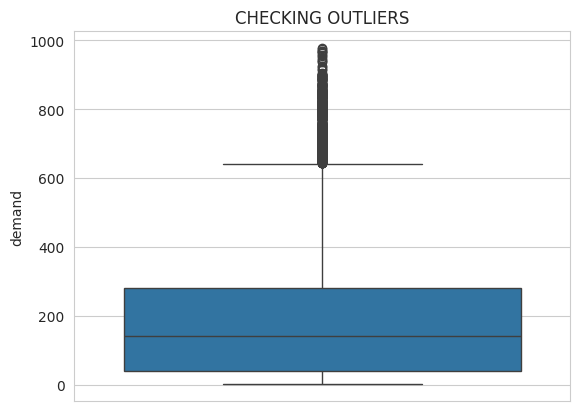

In [ ]:
sns.boxplot(df['demand'])
plt.title('CHECKING OUTLIERS')
plt.show()

In [ ]:
Q1=df['demand'].quantile(0.25)
Q3=df['demand'].quantile(0.75)
IQR=Q3-Q1
left_whisker=Q1-1.5*IQR
right_whisker=Q3+1.5*IQR
outlier=df[(df['demand']<left_whisker) | (df['demand']>right_whisker)]
clean_data=df[(df['demand']>=left_whisker) & (df['demand']<=right_whisker)]

In [ ]:
df['demand'].quantile([0.05,0.1,0.9,0.95,0.99]).to_frame()

,demand
0.05,5.00
0.10,9.00
0.90,451.20
0.95,563.10
0.99,782.22


<Axes: >

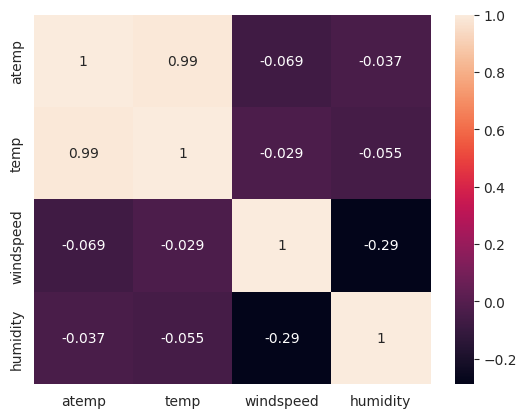

In [ ]:
# STEP 4 - CHECK THE ASSUMPTIONS FOR MULTIPLE LINEAR REGRESSION
# checking Multicollinearity....
correlation=df[['atemp','temp','windspeed','humidity']].corr()
sns.heatmap(correlation,annot=True)

In [ ]:
clean_data=clean_data.drop(['weekday','atemp','windspeed','year','workingday'],axis=1)

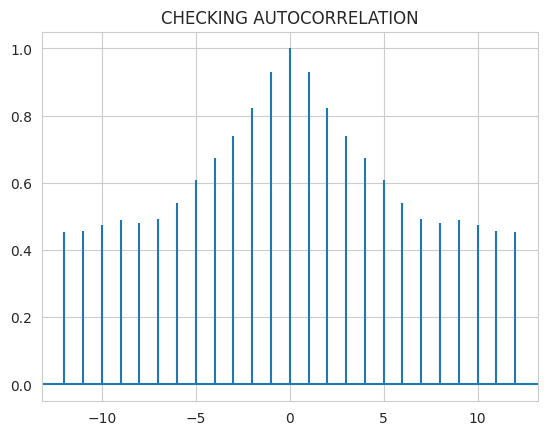

In [ ]:
# check for autocorrelation...
df1=pd.to_numeric(clean_data['demand'],downcast='float')
plt.acorr(df1,maxlags=12)
plt.title('CHECKING AUTOCORRELATION')
plt.show()
# we can clearly see dit is very highly autocorrelated
# so we will considered upto 3 lags

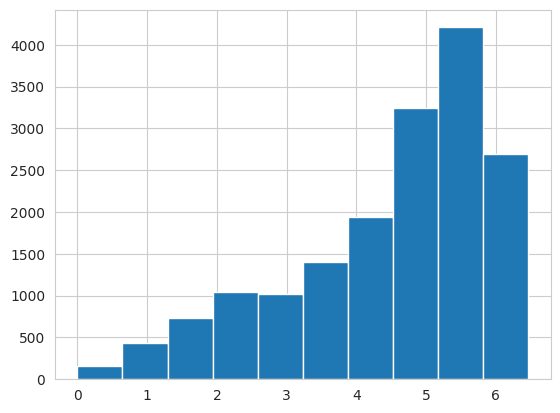

In [ ]:
# Normalizing the demand feature..
df2=np.log(clean_data['demand'])
plt.hist(df2)
plt.show() # we can after doing a log transformation it quite normally distributed
# Hence, we will make changes on the original dataset....

In [ ]:
clean_data['demand']=np.log(clean_data['demand'])

In [ ]:
# solving for autocorrelation...
t_1=clean_data['demand'].shift(+1).to_frame()
t_1.columns=['t-1']
#------------------------------------
t_2=clean_data['demand'].shift(+2).to_frame()
t_2.columns=['t-2']
#------------------------------------
t_3=clean_data['demand'].shift(+3).to_frame()
t_3.columns=['t-3']
#------------------------------------
bikes=pd.concat( [ clean_data , t_1 , t_2 , t_3 ] , axis=1)
bikes.head(10)
bikes=bikes.drop(['date'],axis=1)
bikes=bikes.dropna()

In [ ]:
# STEP 7 - CREATE DUMMY VARIABLE
# month, season, weather, holiday, hour
bikes.dtypes

season        int64
month         int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
demand      float64
t-1         float64
t-2         float64
t-3         float64
dtype: object

In [ ]:
bikes['season']=bikes['season'].astype('category')
bikes['month']=bikes['month'].astype('category')
bikes['weather']=bikes['weather'].astype('category')
bikes['holiday']=bikes['holiday'].astype('category')
bikes['hour']=bikes['hour'].astype('category')
bikes_dummy=pd.get_dummies(bikes,drop_first=True)
bikes_dummy.head(10)

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,0.24,0.75,2.079442,1.098612,0.693147,0.000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,0.32,0.76,2.639057,2.079442,1.098612,0.693147,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,0.38,0.76,3.583519,2.639057,2.079442,1.098612,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,0.36,0.81,4.025352,3.583519,2.639057,2.079442,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12,0.42,0.77,4.430817,4.025352,3.583519,2.639057,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
bikes_dummy.columns

Index(['temp', 'humidity', 'demand', 't-1', 't-2', 't-3', 'season_2',
       'season_3', 'season_4', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'holiday_1',
       'weather_2', 'weather_3', 'weather_4'],
      dtype='object')

In [ ]:
# STEP 8 - SPLIT THE DATA
from sklearn.model_selection import train_test_split

In [ ]:
y=bikes_dummy[['demand']]
x=bikes_dummy.drop(['demand'],axis=1)

In [ ]:
# cause it is a times series type of data and shows high correlation in dependent feature..
# we cannt directly do split..
# rather we will take the first or the last part of the dataset..
size=int(0.7*len(x))
x_train=x[:size]
x_test=x[size:len(x)]
y_train=y[:size]
y_test=y.values[size:len(y)]

In [ ]:
# STEP 9 - TRAIN THE MODEL
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
r2_train=lr.score(x_train,y_train)
r2_test=lr.score(x_test,y_test)
print(f'Train: {r2_train}, Test: {r2_test}')

Train: 0.9173634141512926, Test: 0.9211120355447362


In [ ]:
y_predict=lr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
import math

In [ ]:
rmse=math.sqrt(mean_squared_error(y_predict,y_test))
rmse

0.3911237101825663

In [ ]:
# calculte RMSLE...
y_test_e=[] # we will convert back from logarithmic to normal as we have to apply different formulae now...
y_predict_e=[]
for i in range(0,len(y_predict)):
  y_test_e.append(np.exp(y_test[i]))
  y_predict_e.append(np.exp(y_predict[i]))
# then we will aplly the formulae in another for loop...
log_sqr=0.0
for j in range(0,len(y_predict)):
  log_t=math.log((y_test_e[j])+1)
  log_p=math.log((y_predict_e[j])+1)
  log_sqr+=(log_p-log_t)**2
rmsle=np.sqrt(log_sqr/len(y_test))
rmsle

<ipython-input-216-d595714c7b6b>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  log_t=math.log((y_test_e[j])+1)
<ipython-input-216-d595714c7b6b>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  log_p=math.log((y_predict_e[j])+1)


0.3647613286586108